In [104]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [105]:
import numpy as np
import pandas as pd
import datetime as dt 
from flask import Flask, jsonify
from scipy import stats

In [106]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func



In [107]:
engine = create_engine("sqlite:///hawaii.sqlite") 
app = Flask(__name__)

In [108]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [109]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
print(Base.classes.keys())

['measurement', 'station']


In [110]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [111]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Check measurement data and display in dictionary format
mdata = session.query(Measurement).first()
mdata.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1192fef98>,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [112]:
# find the last data point in the database
lastdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
lastdate

('2017-08-23')

In [113]:
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
yearprecip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-24").\
group_by(Measurement.date).all()
yearprecip


[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [114]:
# Save the query results as a Pandas DataFrame 
# and set the index to the date column
# Sort the dataframe by date
yearprecip_df = pd.DataFrame(yearprecip)
yearprecip_date_df = yearprecip_df.set_index("date")
yearprecip_date_df.head()


,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


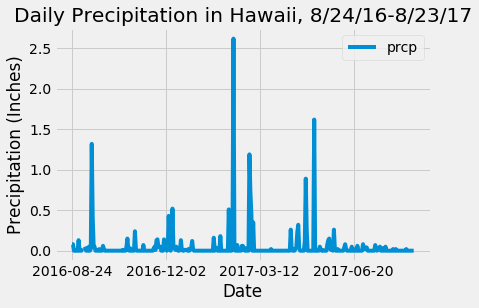

In [115]:
# Use Pandas Plotting with Matplotlib to plot the data
yearprecip_date_df.plot()
plt.title("Daily Precipitation in Hawaii, 8/24/16-8/23/17")
plt.ylabel("Precipitation (Inches)")
plt.xlabel("Date")
plt.savefig("Precipitation Hawaii.png")
plt.show()

In [116]:
# summary of the df
yearprecip_date_df.describe()


,prcp
count,363.000000
mean,0.048843
std,0.205197
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


In [117]:
# Design a query to show how many stations are available in this dataset?

# Check measurement data and display in dictionary format
sdata = session.query(Station).first()
sdata.__dict__

scount = session.query(Station.id).count()
scount

9

In [118]:
# What are the most active stations? 
# (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

srowcount = session.query(Measurement.station, func.count()).\
group_by(Measurement.station).\
order_by(func.count().desc()).\
all()
for station, count in srowcount:
    print(station, count)


USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [119]:
# save the most active station USC00519281
srow1 = srowcount[0][0:2]
station1 = session.query(Measurement.station).\
group_by(Measurement.station).\
order_by(func.count().desc()).\
first()
station1

('USC00519281')

In [120]:
(station1_id, ) = station1
print(f"The station id of the most active station is {station1_id}.")

The station id of the most active station is USC00519281.


In [121]:
# Using the station id from the previous query, 
# calculate the lowest temperature recorded, 
# highest temperature recorded, 
# and average temperature of the most active station?

station1_data = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == station1_id) .\
all()

In [122]:
for lowtemp, hightemp, avgtemp in station1_data:
    print(f"The lowest temperature recorded at {station1_id} was {lowtemp}.")
    print(f"The highest temperature recorded at {station1_id} was {hightemp}.")
    print(f"The average temperature recorded at {station1_id} was {avgtemp}.")
    
station1_temp_df = pd.DataFrame({
    "Lowest Temperature": lowtemp,
    "Highest Temperature": hightemp,
    "Average Temperature": avgtemp
}, index=[0])

station1_temp_df


The lowest temperature recorded at USC00519281 was 54.0.
The highest temperature recorded at USC00519281 was 85.0.
The average temperature recorded at USC00519281 was 71.66378066378067.


,Lowest Temperature,Highest Temperature,Average Temperature
0,54.0,85.0,71.663781


In [123]:
# Query the last 12 months of temperature observation data for this station
alltemps1 = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= "2016-08-24").filter(Measurement.station == station1_id).order_by(Measurement.date).all()
alltemps1

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

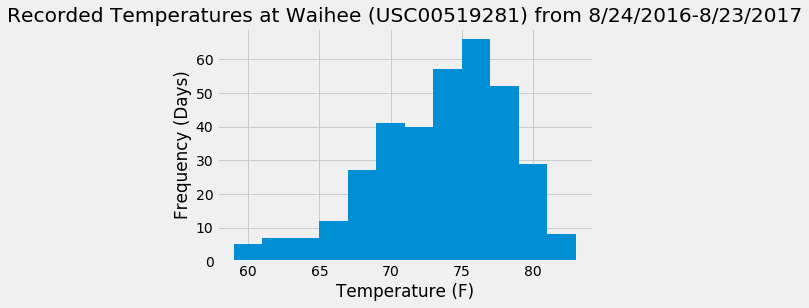

<Figure size 432x288 with 0 Axes>

In [124]:
# and plot the results as a histogram
temps = [x[1] for x in alltemps1]
plt.hist(temps, bins=12)
plt.ylabel("Frequency (Days)")
plt.xlabel("Temperature (F)")
plt.title("Recorded Temperatures at Waihee (USC00519281) from 8/24/2016-8/23/2017")
plt.show()
plt.savefig("temp analysis.png")

In [128]:
# Bonus: Temp Analysis I
# Get the avg temperature in June and Dec from all stations
june_avg = session.query(func.avg(Measurement.tobs)).\
filter(func.strftime("%m", Measurement.date) == "06").all()
june_avg

[(74.94411764705882)]

In [129]:
dec_avg = session.query(func.avg(Measurement.tobs)).\
filter(func.strftime("%m", Measurement.date) == "12").all()
dec_avg

[(71.04152933421226)]

In [133]:
# put all the temperatures in lists
all_june_temps = session.query(Measurement.tobs).\
filter(func.strftime("%m", Measurement.date) == "06").all()
june_list = list(np.ravel(all_june_temps))
june_list

[76.0,
 74.0,
 74.0,
 64.0,
 64.0,
 67.0,
 77.0,
 66.0,
 69.0,
 68.0,
 68.0,
 71.0,
 74.0,
 67.0,
 66.0,
 69.0,
 71.0,
 70.0,
 70.0,
 74.0,
 74.0,
 71.0,
 75.0,
 75.0,
 72.0,
 69.0,
 68.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 73.0,
 71.0,
 73.0,
 73.0,
 77.0,
 72.0,
 71.0,
 73.0,
 70.0,
 73.0,
 69.0,
 74.0,
 72.0,
 71.0,
 72.0,
 72.0,
 70.0,
 73.0,
 73.0,
 72.0,
 73.0,
 73.0,
 72.0,
 63.0,
 65.0,
 71.0,
 76.0,
 70.0,
 76.0,
 69.0,
 69.0,
 69.0,
 74.0,
 76.0,
 74.0,
 73.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 74.0,
 74.0,
 71.0,
 73.0,
 72.0,
 64.0,
 66.0,
 73.0,
 72.0,
 65.0,
 64.0,
 69.0,
 68.0,
 77.0,
 71.0,
 71.0,
 69.0,
 68.0,
 68.0,
 69.0,
 70.0,
 72.0,
 76.0,
 75.0,
 69.0,
 71.0,
 71.0,
 71.0,
 68.0,
 65.0,
 70.0,
 69.0,
 69.0,
 71.0,
 67.0,
 73.0,
 74.0,
 73.0,
 67.0,
 74.0,
 75.0,
 75.0,
 74.0,
 67.0,
 73.0,
 73.0,
 71.0,
 72.0,
 71.0,
 68.0,
 65.0,
 69.0,
 70.0,
 70.0,
 74.0,
 71.0,
 74.0,
 73.0,
 72.0,
 74.0,
 72.0,
 74.0,
 75.0,
 74.0,
 70.0,
 74.0,
 70.0,
 66.0,
 61.0,
 63.0,

In [134]:
all_dec_temps = session.query(Measurement.tobs).\
filter(func.strftime("%m", Measurement.date) == "12").all()
dec_list = list(np.ravel(all_dec_temps))
dec_list

[76.0,
 74.0,
 74.0,
 64.0,
 64.0,
 67.0,
 77.0,
 66.0,
 69.0,
 68.0,
 68.0,
 71.0,
 74.0,
 67.0,
 66.0,
 69.0,
 71.0,
 70.0,
 70.0,
 74.0,
 74.0,
 71.0,
 75.0,
 75.0,
 72.0,
 69.0,
 68.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 73.0,
 71.0,
 73.0,
 73.0,
 77.0,
 72.0,
 71.0,
 73.0,
 70.0,
 73.0,
 69.0,
 74.0,
 72.0,
 71.0,
 72.0,
 72.0,
 70.0,
 73.0,
 73.0,
 72.0,
 73.0,
 73.0,
 72.0,
 63.0,
 65.0,
 71.0,
 76.0,
 70.0,
 76.0,
 69.0,
 69.0,
 69.0,
 74.0,
 76.0,
 74.0,
 73.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 74.0,
 74.0,
 71.0,
 73.0,
 72.0,
 64.0,
 66.0,
 73.0,
 72.0,
 65.0,
 64.0,
 69.0,
 68.0,
 77.0,
 71.0,
 71.0,
 69.0,
 68.0,
 68.0,
 69.0,
 70.0,
 72.0,
 76.0,
 75.0,
 69.0,
 71.0,
 71.0,
 71.0,
 68.0,
 65.0,
 70.0,
 69.0,
 69.0,
 71.0,
 67.0,
 73.0,
 74.0,
 73.0,
 67.0,
 74.0,
 75.0,
 75.0,
 74.0,
 67.0,
 73.0,
 73.0,
 71.0,
 72.0,
 71.0,
 68.0,
 65.0,
 69.0,
 70.0,
 70.0,
 74.0,
 71.0,
 74.0,
 73.0,
 72.0,
 74.0,
 72.0,
 74.0,
 75.0,
 74.0,
 70.0,
 74.0,
 70.0,
 66.0,
 61.0,
 63.0,

In [136]:
# t-test = independent t-test
stats.ttest_ind(june_list, dec_list, equal_var=False)

Ttest_indResult(statistic=31.355036920962423, pvalue=4.193529835915755e-187)

In [ ]:
# Bonus II
# choose date range for the trip - Oct. 1-7 (inclusive, 7 days)

In [154]:
# This function called `calc_temps` will accept start date and end date 
# in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))  


[(62.0, 69.57142857142857, 74.0)]


In [160]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
    trip_temps = calc_temps('2016-10-01', '2016-10-07')
    trip_temps

[(73.0, 78.08510638297872, 81.0)]

In [166]:
# Plot the results from your previous query as a bar chart. 
    plt.figure(figsize=(2,5))
    plt.bar(1, trip_temps[1], yerr = (trip_temps[2] - trip_temps[0]), tick_label="")
    plt.title("Trip Avg Temp")
    plt.ylabel("Avg Temp (F)")
    plt.show()

    
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


IndexError: list index out of range

In [ ]:
# flask API py code
import numpy as np
import pandas as pd
import datetime as dt 
from flask import Flask, jsonify

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

engine = create_engine("sqlite:///hawaii.sqlite") 
app = Flask(__name__)

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
print(Base.classes.keys())

# Create our session (link) from Python to the DB
session = Session(engine)

# Climate app/Flask 
# home page
@app.route("/")
def home():
    print("Server receiver request for Hawaii Weather API.")
    return "Welcome to the Hawaii Weather API."

# list all routes
@app.route("/welcome")
def welcome():
    return (f"Welcome to the Hawaii Weather API<br>"
            f"Available Routes<br>"
            f"/api/v1.0/precipitation<br>"
            f"/api/v1.0/stations<br>"
            f"/api/v1.0/tobs<br>"
            f"/api/v1.0/<start><br>"
            f"/api/v1.0<start>/<end><br>")

# /api/v1.0/precipitation
@app.route("/api/v1.0/precipitation")
def precipitation():
    pquery = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
    lastdate = pquery[0]
    startdate = lastdate.replace(year = (lastdate.year - 1))
    startdate = startdate.strftime("%Y-%m-%d")

    precip_list = []
    precip = session.query(Station.name, Measurement.date, Measurement.prcp).filter(Measurement.station==Station.station).filter(Measurement.date>=startdate).order_by(Measurement.date).all()
    for p in precip:
        precip_list.append({"station":p[0],"date":p[1],"prcp":p[2]})

    return jsonify(precip_list)

# /api/v1.0/stations
@app.route("/api/v1.0/stations")
def stations():
    squery = session.query(Station.station, Station.name, Measurement.station, func.count(Measurement.tobs)).filter(Station.station == Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
    station_list = []
    for s in stations:
        station_list.append({"station":s[0],"name":s[1]})
    return jsonify(station_list)

# /api/v1.0/tobs
@app.route("/api/v1.0/tobs")
def tobs():
    tobs_list = []
    tquery = session.query(Measurement.tobs).filter(Measurement.date >= "08-24-2016").all()
    tobs_list = list(np.ravel(tquery))
    return jsonify(tobs_list)

# /api/v1.0/<start>
@app.route("/api/v1.0/<start>")
def start(start):
    startdate = datetime.strptime(start, '%Y-%m-%d')

    mintemp = session.query(func.min(Measurement.tobs)).filter(Measurement.date >= startdate).scalar()
    #print(f"Minimum temp: {mintemp}")
    maxtemp = session.query(func.max(Measurement.tobs)).filter(Measurement.date >= startdate).scalar()
    # print(f"Maximum temp: {maxtemp}")
    avgtemp = session.query(func.round(func.avg(Measurement.tobs))).filter(Measurement.date >= startdate).scalar()
    # print(f"Average temp: {avgtemp}")
    result = [{"Minimum":mintemp},{"Maximum":maxtemp},{"Average":avgtemp}]
    return jsonify(result)

# <start>/<end>
@app.route("/api/v1.0/<start>/<end>")
def startend(start,end):
    startdate2 = datetime.strptime(start, '%Y-%m-%d')
    enddate2 = datetime.strptime(end, '%Y-%m-%d')

    min2 = session.query(func.min(Measurement.tobs)).filter(Measurement.date.between(startdate2, enddate2)).scalar()
     # print(f"Minimum temp: {min2}")
    max2 = session.query(func.max(Measurement.tobs)).filter(Measurement.date.between(startdate2, enddate2)).scalar()
     # print(f"Maximum temp: {max2}")
    avg2 = session.query(func.round(func.avg(Measurement.tobs))).filter(Measurement.date.between(startdate2, enddate2)).scalar()
     # print(f"Average temp: {avg2}")
    result = [{"Minimum":min2},{"Maximum":max2},{"Average":avg2}]
    return jsonify(result)

if __name__ == '__main__':
    app.run(debug=True)


